In [1]:
import pandas as pd

Understanding our Cost of Living Indexes
The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.

Here's a breakdown of each index and its meaning:

Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).

Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.

Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.

Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. Numbeo uses item 
weights from the "Markets" section to calculate this index for each city.

Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.

Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.

In [2]:
Ruta = "Cost_of_Living_Index_by_Country_2024_with_continent.csv"

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')

datos.head(10)

,Rank,Country,Continent,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,Europe,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,North America,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,Europe,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,Asia,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,North America,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,Europe,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,Europe,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),Asia,70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,North America,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,Oceania,70.2,33.4,52.5,77.3,62.5,127.4


In [3]:
#Variable a analizar
variable = "Restaurant Price Index"

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Continent                       121 non-null    object 
 3   Cost of Living Index            121 non-null    float64
 4   Rent Index                      121 non-null    float64
 5   Cost of Living Plus Rent Index  121 non-null    float64
 6   Groceries Index                 121 non-null    float64
 7   Restaurant Price Index          121 non-null    float64
 8   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.6+ KB


In [8]:
#Cargar las librerías
import numpy as np
import matplotlib.pyplot as plt #Graficar
%matplotlib inline
import seaborn as sns
from collections import Counter
import math
from matplotlib.patches import Ellipse
from scipy.cluster.hierarchy import linkage, leaves_list
import statsmodels.api as sm
import matplotlib.font_manager
import geopandas as gpd
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Medidas de tendecia central

In [9]:
#Media
media_Transport =datos[variable].mean()
print(f"Media del {variable} es:", media_Transport)
#Mediana
mediana_Transport =datos[variable].median()
print(f"Mediana del {variable} es: {mediana_Transport}")
#Moda
moda_Transport = datos[variable].mode()
print(f"Moda del {variable} es:", moda_Transport)

Media del Restaurant Price Index es: 36.471074380165284
Mediana del Restaurant Price Index es: 33.1
Moda del Restaurant Price Index es: 0    20.6
Name: Restaurant Price Index, dtype: float64


2. Medidas de variabilidad

In [10]:
#Varianza
varianza_Transport =datos[variable].var()
print(f"La varianza del {variable} es:", varianza_Transport)
#Desviación estandar
desvest_Transport =np.sqrt(varianza_Transport)
print(f"La desviación estándar del {variable} es:", desvest_Transport)
#Coeficiente de variación
CV_Transport=(desvest_Transport/media_Transport)*100
print(f"El coeficiente de variación de {variable} es:", CV_Transport)
#Rango
Rango_Transport=datos[variable].max()-datos[variable].min()
print(f"El rango de {variable} es:", Rango_Transport)

La varianza del Restaurant Price Index es: 333.3585730027549
La desviación estándar del Restaurant Price Index es: 18.258109787235778
El coeficiente de variación de Restaurant Price Index es: 50.06189178009357
El rango de Restaurant Price Index es: 84.2


Medidas de forma

In [11]:
#Coeficiente de Asimetría
Asimetria_Transport=datos[variable].skew()
print(f"El coeficiente de asimetría del {variable} es:", Asimetria_Transport)
#Coeficiente de Kurtosis
Kurtosis_Transport=datos[variable].kurt()
print(f"El coeficiente de curtosis del {variable} es:", Kurtosis_Transport)

El coeficiente de asimetría del Restaurant Price Index es: 0.9483348502214115
El coeficiente de curtosis del Restaurant Price Index es: 0.4485666063865894


Medidas de pocisión

In [12]:
#Tercios
Q1= np.percentile(datos[variable], 33)
Q2= np.percentile(datos[variable], 66)
print(Q1,Q2)
print(f"El 33% de los valores del {variable} son menores o iguales a:", Q1)
print(f"El 66% de los valores del {variable} son menores o iguales a:", Q2)

24.86 39.56000000000001
El 33% de los valores del Restaurant Price Index son menores o iguales a: 24.86
El 66% de los valores del Restaurant Price Index son menores o iguales a: 39.56000000000001


In [14]:
#Cuartiles
Q1= np.percentile(datos[variable], 25)
Q2= np.percentile(datos[variable], 50)
Q3= np.percentile(datos[variable], 75)
print(Q1,Q2,Q3)
print(f"El 25% de los valores del {variable} son menores o iguales a:", Q1)
print(f"El 50% de los valores del {variable} son menores o iguales a:", Q2)
print(f"El 75% de los valores del {variable} son menores o iguales a:", Q3)

21.6 33.1 47.2
El 25% de los valores del Restaurant Price Index son menores o iguales a: 21.6
El 50% de los valores del Restaurant Price Index son menores o iguales a: 33.1
El 75% de los valores del Restaurant Price Index son menores o iguales a: 47.2


In [15]:
#Quintiles
Q1= np.percentile(datos[variable], 20)
Q2= np.percentile(datos[variable], 40)
Q3= np.percentile(datos[variable], 60)
Q4= np.percentile(datos[variable], 80)
print(Q1,Q2,Q3,Q4)
print(f"El 20% de los valores del {variable} son menores o iguales a:", Q1)
print(f"El 40% de los valores del {variable} son menores o iguales a:", Q2)
print(f"El 60% de los valores del {variable} son menores o iguales a:", Q3)
print(f"El 80% de los valores del {variable} son menores o iguales a:", Q4)

20.6 28.0 36.3 52.8
El 20% de los valores del Restaurant Price Index son menores o iguales a: 20.6
El 40% de los valores del Restaurant Price Index son menores o iguales a: 28.0
El 60% de los valores del Restaurant Price Index son menores o iguales a: 36.3
El 80% de los valores del Restaurant Price Index son menores o iguales a: 52.8


In [16]:
#Realizando una descripción rápida de las variables numéricas
datos.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


Tablas y gráficas para una variable continua

In [17]:
#Tabla de frecuencias con los intervalos automáticos

def tabla_frecuencia(datos):
    columna = datos[variable]  # Seleccionar la columna de interés
    n = len(columna)  # Cantidad de datos
    k = math.ceil(1 + math.log2(n))  # Regla de Sturges
    min_val, max_val = min(columna), max(columna)
    rango = max_val - min_val
    amplitud = rango / k  # Amplitud de los intervalos

    # Definir los intervalos
    bins = np.linspace(min_val, max_val, k + 1)

    # Calcular frecuencias
    frecuencias, _ = np.histogram(columna, bins)

    # Calcular frecuencias acumuladas
    frec_acumulada = np.cumsum(frecuencias)

    # Calcular frecuencia relativa
    frec_relativa = frecuencias / n

    # Calcular frecuencia relativa acumulada
    frec_rel_acumulada = np.cumsum(frec_relativa)

    # Crear tabla de frecuencias
    tabla = pd.DataFrame({
        'Intervalo': [f'[{bins[i]:.2f}, {bins[i+1]:.2f})' for i in range(len(bins)-1)],
        'Frecuencia': frecuencias,
        'Frec. Acumulada': frec_acumulada,
        'Frec. Relativa': frec_relativa,
        'Frec. Rel. Acumulada': frec_rel_acumulada
    })

    return tabla

# Aplicar función al DataFrame
resultado = tabla_frecuencia(datos)
print(resultado)

        Intervalo  Frecuencia  Frec. Acumulada  Frec. Relativa  \
0  [12.80, 23.33)          38               38        0.314050   
1  [23.33, 33.85)          24               62        0.198347   
2  [33.85, 44.38)          25               87        0.206612   
3  [44.38, 54.90)          14              101        0.115702   
4  [54.90, 65.42)          10              111        0.082645   
5  [65.42, 75.95)           6              117        0.049587   
6  [75.95, 86.47)           2              119        0.016529   
7  [86.47, 97.00)           2              121        0.016529   

   Frec. Rel. Acumulada  
0              0.314050  
1              0.512397  
2              0.719008  
3              0.834711  
4              0.917355  
5              0.966942  
6              0.983471  
7              1.000000  


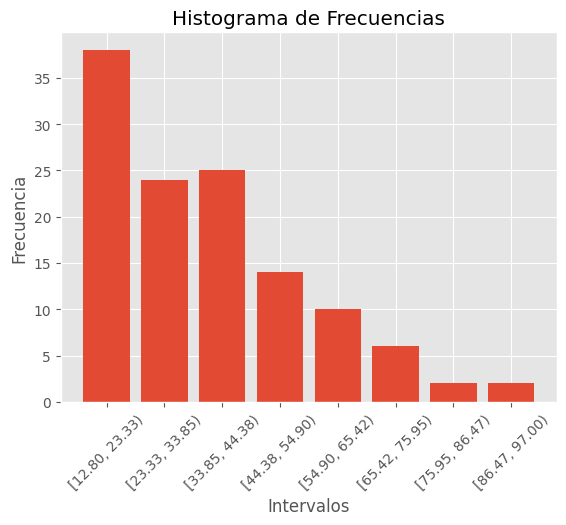

In [18]:
#El histograma de frecuencias
plt.bar(resultado['Intervalo'], resultado['Frecuencia'], align='center')
plt.xticks(rotation=45)
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')
plt.show()

<Axes: xlabel='Restaurant Price Index', ylabel='Density'>

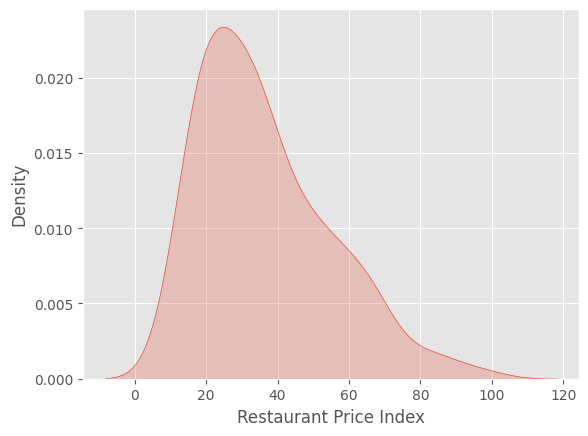

In [20]:
#Gráfico de densidad
sns.kdeplot(datos[variable], fill=True)

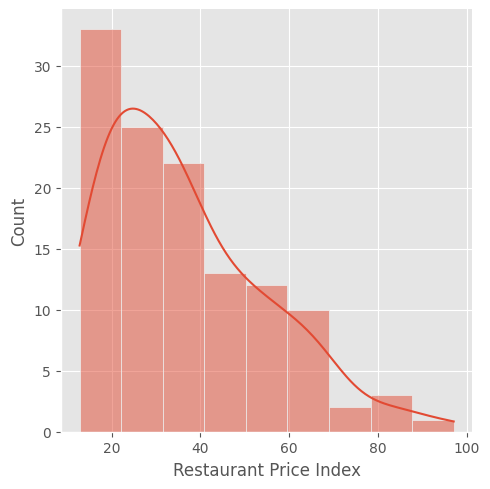

In [21]:
#Diagrama de Densidad con histograma
sns.displot(datos[variable], kde=True)

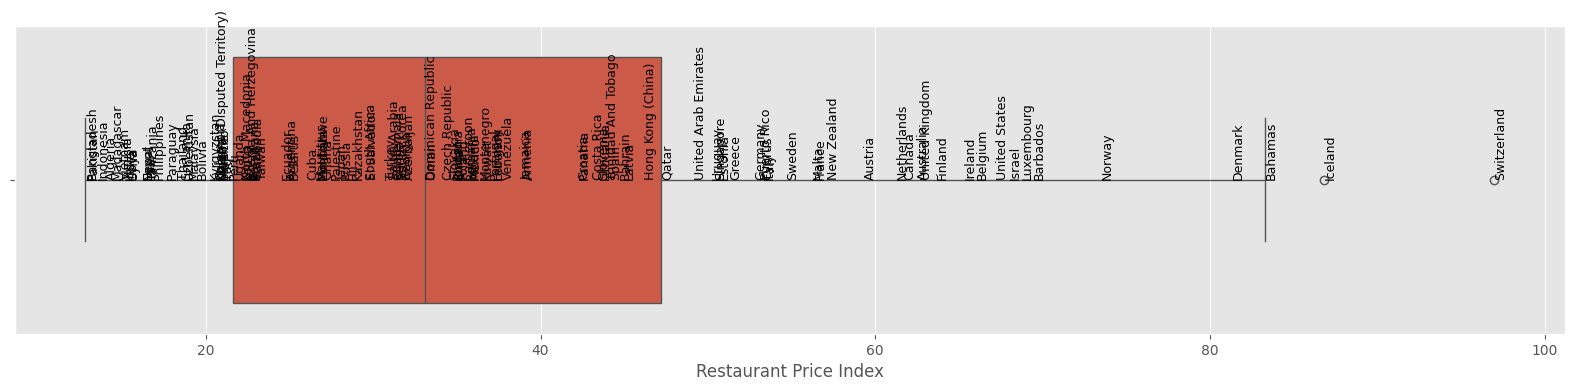

In [22]:
#El gráfico de caja y bigotes
#sns.boxplot(datos['Transport'],orient="h")

plt.figure(figsize=(20, 4))
sns.boxplot( x=datos[variable], orient="h")

# Agregar etiquetas manualmente
for i, txt in enumerate(datos['Country']):
    plt.text(datos[variable].iloc[i], 0, txt, fontsize=9, verticalalignment='bottom', rotation=90)

Tablas y gráficas para una variable categórica: para esta sección elegimos Continent

Tablas y gráficas para una variable categórica

Continent
Europe           40
Asia             38
Africa           16
North America    14
South America    10
Oceania           3
Name: count, dtype: int64


Continent
Europe           0.330579
Asia             0.314050
Africa           0.132231
North America    0.115702
South America    0.082645
Oceania          0.024793
Name: proportion, dtype: float64

Grafico Barras 



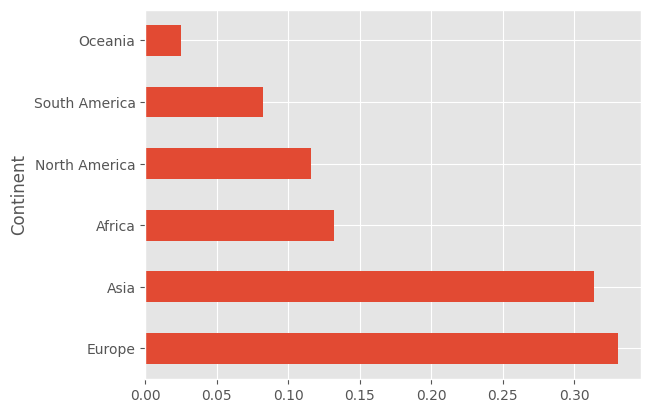

In [23]:
#Gráficos de barras
print(datos['Continent'].value_counts())
print("\n")
print(datos['Continent'].value_counts(normalize=True))


print("\nGrafico Barras \n")
datos['Continent'].value_counts(normalize=True).plot.barh()
plt.show()

Continent
Europe           0.330579
Asia             0.314050
Africa           0.132231
North America    0.115702
South America    0.082645
Oceania          0.024793
Name: proportion, dtype: float64


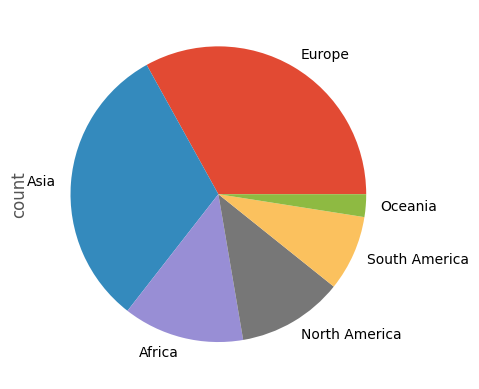

In [24]:
#Gráfico de torta
print(datos['Continent'].value_counts(normalize=True))
datos['Continent'].value_counts().plot.pie()
plt.show()

Medidas y gráficas descriptivas multivariadas

In [25]:
#Separar las variables continuas de las demás
continuas=datos[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]]


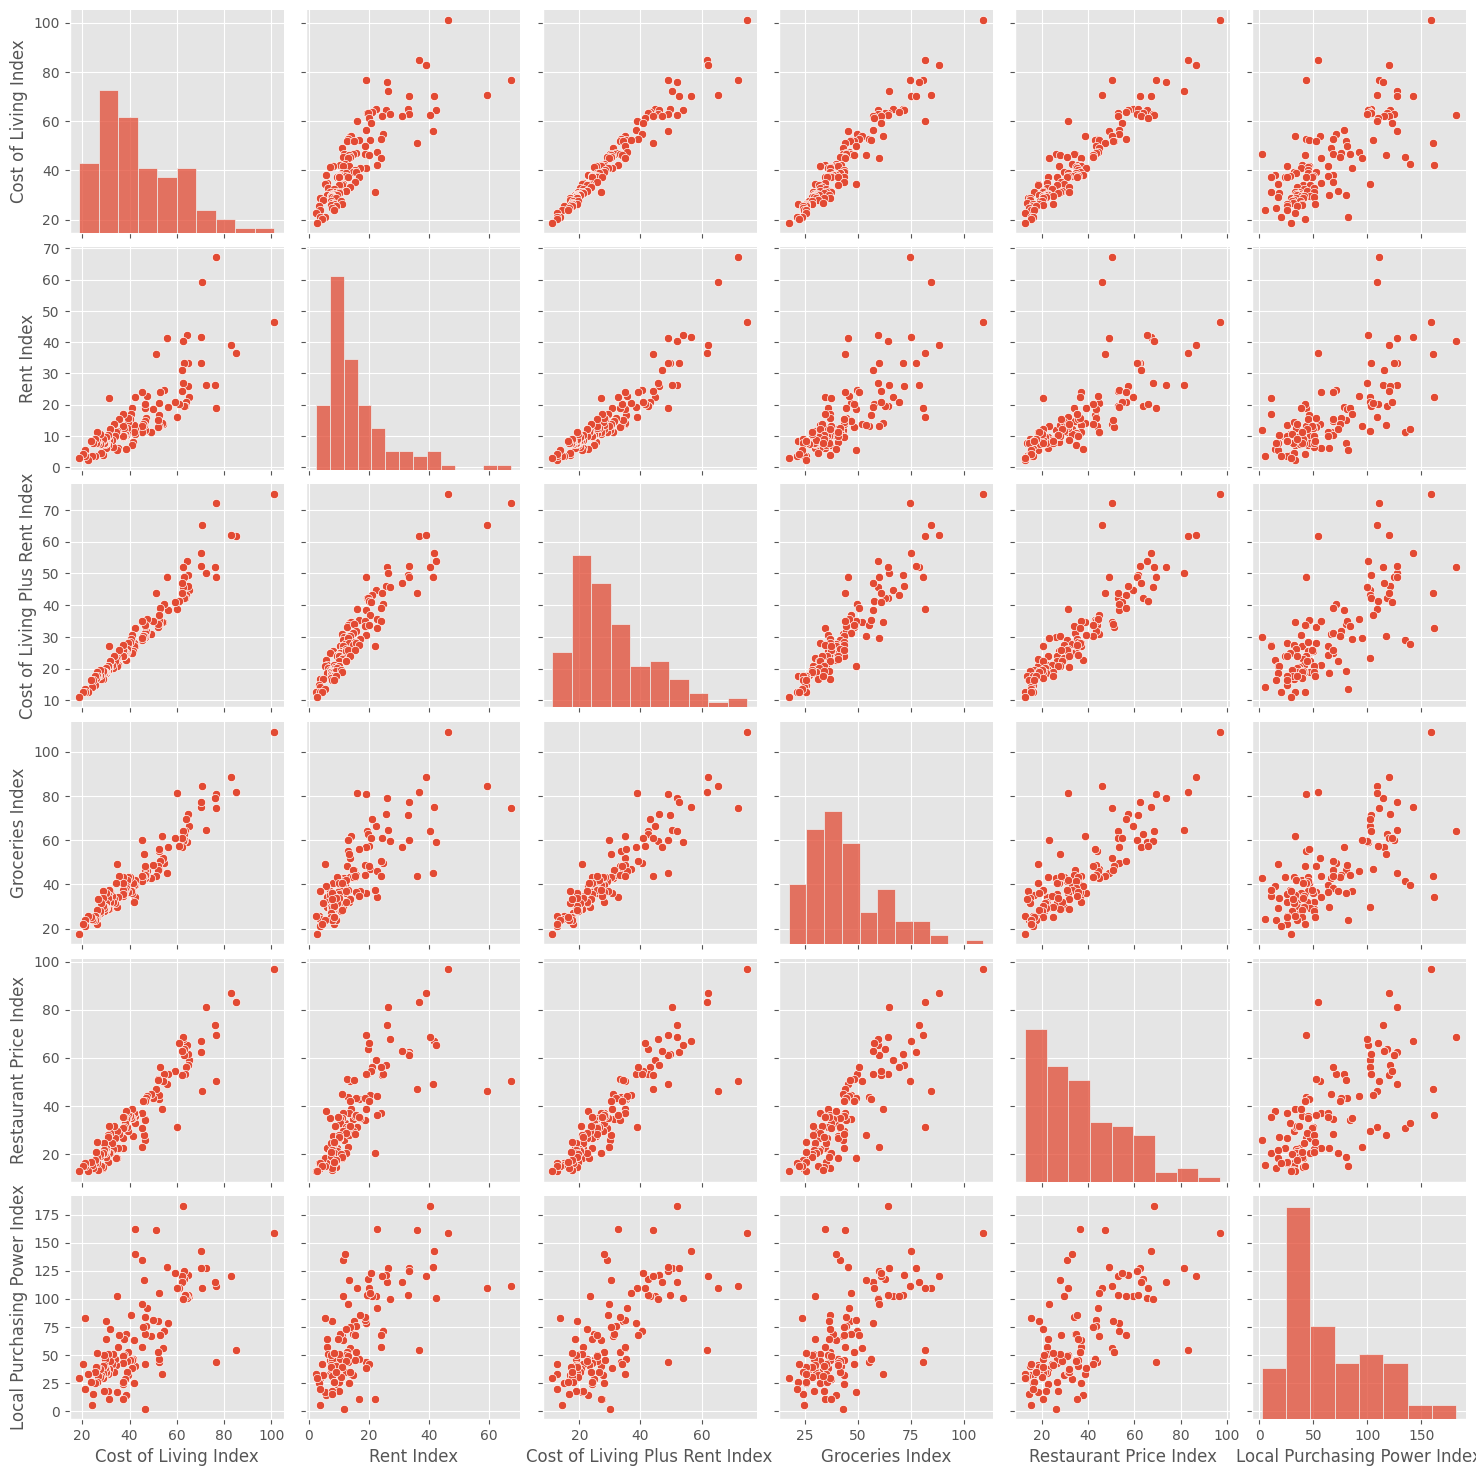

In [26]:
#Gráfico exploratorio por pares de variables
sns.pairplot(continuas)

In [27]:
#La matriz de correlaciones
correlation_matrix=continuas.corr()
continuas.corr()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Cost of Living Index,1.000000,0.820885,0.971780,0.958452,0.945483,0.692688
Rent Index,0.820885,1.000000,0.932425,0.770944,0.763537,0.683912
Cost of Living Plus Rent Index,0.971780,0.932425,1.000000,0.924935,0.913618,0.720701
Groceries Index,0.958452,0.770944,0.924935,1.000000,0.855057,0.640634
Restaurant Price Index,0.945483,0.763537,0.913618,0.855057,1.000000,0.673539
Local Purchasing Power Index,0.692688,0.683912,0.720701,0.640634,0.673539,1.000000


Axes(0.125,0.11;0.62x0.77)


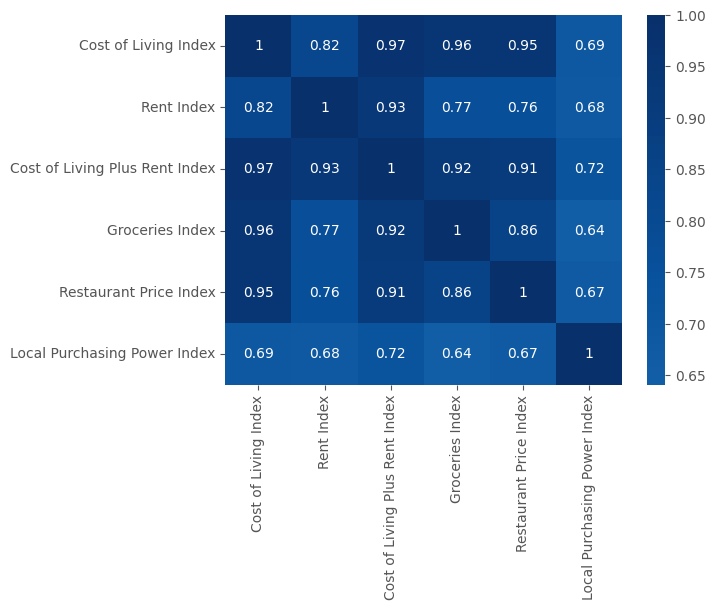

In [28]:
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))

# **Análisis de componentes principales PCA**

In [29]:
scaler = StandardScaler()
continuas_scaled = scaler.fit_transform(continuas)
pca = PCA()
res_pca = pca.fit(continuas_scaled)

np.set_printoptions(suppress=True)

print("Valores propios (Varianza explicada por cada componente):")
print(np.round(res_pca.explained_variance_, 2))

print("\nProporción de varianza explicada:")
print(np.round(res_pca.explained_variance_ratio_, 2))

print("\nCargas de los componentes (loadings):")
print(np.round(res_pca.components_, 2))

Valores propios (Varianza explicada por cada componente):
[5.16 0.45 0.28 0.14 0.02 0.  ]

Proporción de varianza explicada:
[0.85 0.08 0.05 0.02 0.   0.  ]

Cargas de los componentes (loadings):
[[ 0.43  0.4   0.44  0.41  0.41  0.35]
 [-0.23  0.09 -0.11 -0.3  -0.19  0.9 ]
 [-0.21  0.82  0.21 -0.23 -0.34 -0.26]
 [-0.04  0.07  0.   -0.68  0.72 -0.09]
 [ 0.68 -0.21  0.34 -0.47 -0.39 -0.01]
 [-0.5  -0.33  0.8  -0.   -0.    0.  ]]


In [30]:
#Una mejor visualización de los resultados
cumVar = pd.DataFrame(np.cumsum(res_pca.explained_variance_ratio_)*100,
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(res_pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4", 4: "PC5", 5: "PC6"})

,VarPerc,cumVarPerc
PC1,85.244235,85.244235
PC2,7.511186,92.755421
PC3,4.605145,97.360566
PC4,2.380536,99.741102
PC5,0.258822,99.999923
PC6,0.000077,100.000000


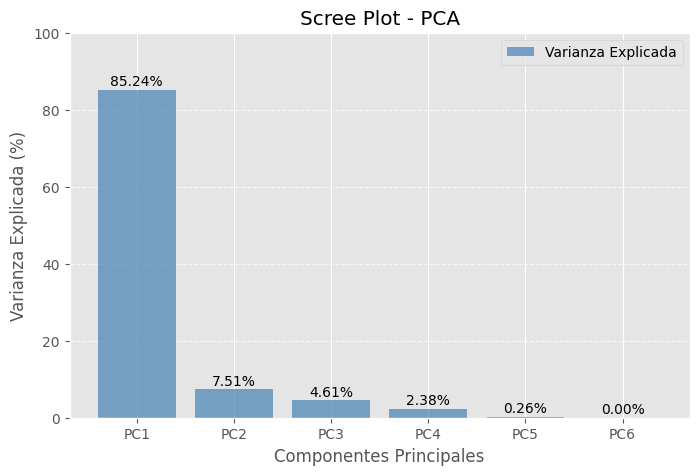

In [31]:
#Visualización del PCA
plt.figure(figsize=(8,5))
plt.bar(range(1, len(res_pca.explained_variance_ratio_)+1),
        res_pca.explained_variance_ratio_*100,
        alpha=0.7, color="steelblue", label="Varianza Explicada")

for i, var in enumerate(res_pca.explained_variance_ratio_*100):
    plt.text(i+1, var+1, f"{var:.2f}%", ha='center', fontsize=10)

plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada (%)")
plt.title("Scree Plot - PCA")
plt.ylim(0, 100)
plt.xticks(range(1, len(res_pca.explained_variance_ratio_)+1),
           [f"PC{i+1}" for i in range(len(res_pca.explained_variance_ratio_))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.85244235 0.07511186 0.04605145 0.02380536 0.00258822 0.00000077]


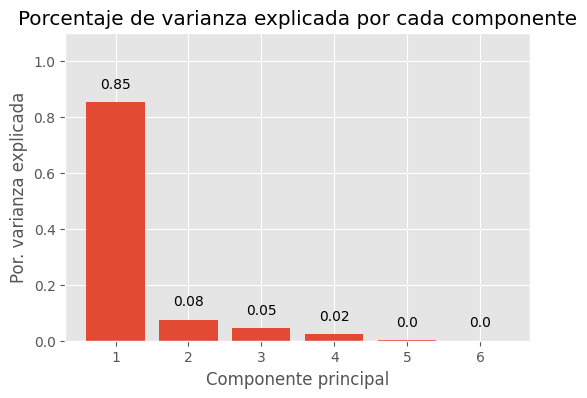

In [32]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(res_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(res_pca.n_components_) + 1,
    height = res_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, res_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(res_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

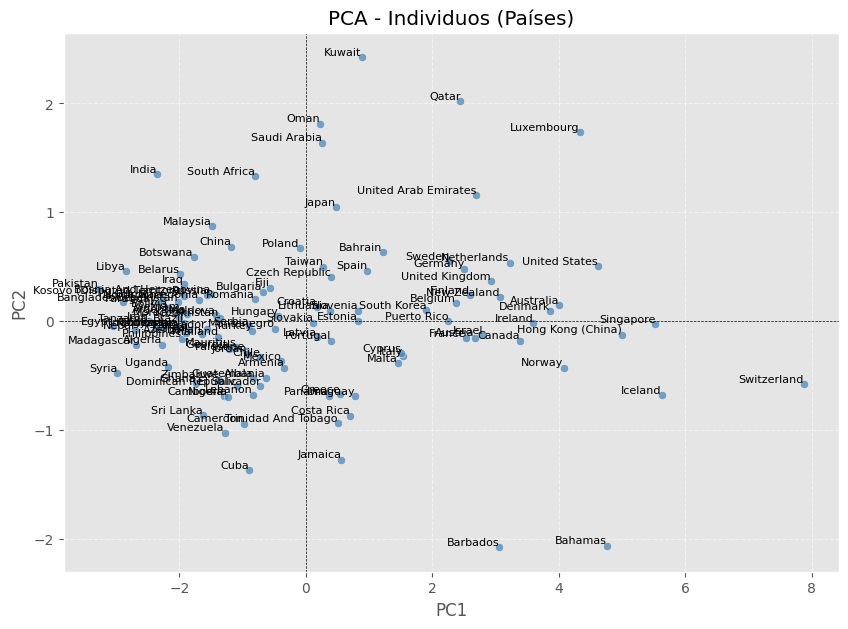

In [33]:
#El gráfico Biplot
pred = res_pca.transform(continuas_scaled)
df_pred = pd.DataFrame(pred, columns=[f"PC{i+1}" for i in range(pred.shape[1])])
df_pca_scores=df_pred


paises = datos.iloc[:, 1]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca_scores["PC1"], y=df_pca_scores["PC2"], color="steelblue", alpha=0.7)

# Etiquetas con los nombres de los países
for i, pais in enumerate(paises):
    plt.text(df_pca_scores["PC1"][i], df_pca_scores["PC2"][i], pais, fontsize=8, ha='right', va='bottom')

# Configuración del gráfico
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - Individuos (Países)")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar el gráfico
plt.show()

In [34]:
#Guardar los scores (PCA)

pred = res_pca.transform(continuas_scaled)
df_pred = pd.DataFrame(pred, columns=[f"PC{i+1}" for i in range(pred.shape[1])])
df_pred.to_csv("componentes.csv", sep=';', index=False)

# Mostrar las primeras filas del DataFrame
print(df_pred)

          PC1       PC2       PC3       PC4       PC5       PC6
0    7.872462 -0.579802 -0.482162 -0.333892 -0.106184  0.000762
1    4.762191 -2.062649  0.137815  0.429670  0.134260 -0.000525
2    5.627417 -0.679141 -0.250759  0.169923 -0.265890  0.001220
3    5.527495 -0.024774  2.946535 -0.516649  0.365070 -0.001531
4    3.055858 -2.076022 -0.890795 -0.159515  0.099124 -0.002986
..        ...       ...       ...       ...       ...       ...
116 -2.898060  0.177327 -0.082524 -0.167560 -0.059811 -0.003789
117 -2.348467  1.348750 -0.168747 -0.088352 -0.154449 -0.001410
118 -3.044180 -0.044137  0.114087  0.189106 -0.095166 -0.000470
119 -2.843579  0.462109  0.023169  0.064880 -0.141476  0.000927
120 -3.272759  0.299325  0.103652  0.184332 -0.040035 -0.001799

[121 rows x 6 columns]


In [35]:
cols_pca = df_pred.iloc[:, :2]
datos_pca = pd.concat([datos, cols_pca], axis=1)
datos_pca

,Rank,Country,Continent,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,PC1,PC2
0,1,Switzerland,Europe,101.1,46.5,74.9,109.1,97.0,158.7,7.872462,-0.579802
1,2,Bahamas,North America,85.0,36.7,61.8,81.6,83.3,54.6,4.762191,-2.062649
2,3,Iceland,Europe,83.0,39.2,62.0,88.4,86.8,120.3,5.627417,-0.679141
3,4,Singapore,Asia,76.7,67.2,72.1,74.6,50.4,111.1,5.527495,-0.024774
4,5,Barbados,North America,76.6,19.0,48.9,80.8,69.4,43.5,3.055858,-2.076022
...,...,...,...,...,...,...,...,...,...,...,...
116,117,Bangladesh,Asia,22.5,2.4,12.8,25.7,12.8,33.1,-2.898060,0.177327
117,118,India,Asia,21.2,5.6,13.7,23.8,15.1,82.6,-2.348467,1.348750
118,119,Egypt,Africa,21.0,3.7,12.7,21.2,16.2,20.0,-3.044180,-0.044137
119,120,Libya,Africa,20.4,4.3,12.7,22.2,15.2,42.0,-2.843579,0.462109


In [36]:
datos_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Continent                       121 non-null    object 
 3   Cost of Living Index            121 non-null    float64
 4   Rent Index                      121 non-null    float64
 5   Cost of Living Plus Rent Index  121 non-null    float64
 6   Groceries Index                 121 non-null    float64
 7   Restaurant Price Index          121 non-null    float64
 8   Local Purchasing Power Index    121 non-null    float64
 9   PC1                             121 non-null    float64
 10  PC2                             121 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 10.5+ KB


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

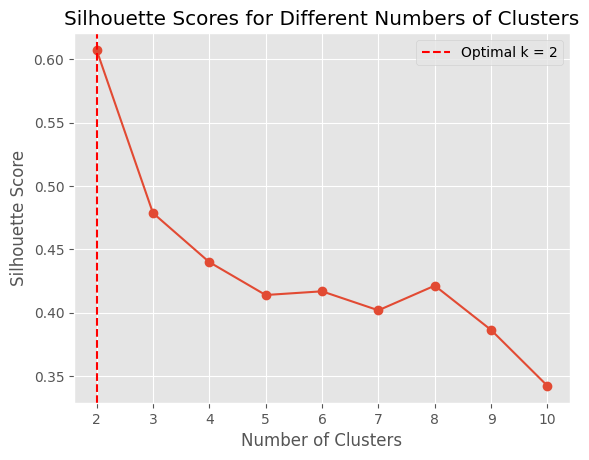

In [39]:
#Coeficiente de Silhoutte para el número de grupos
#data=datos_pca[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]]
data=datos_pca[["PC1","PC2"]]

def fviz_nbclust(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    # Find the optimal number of clusters (k)
    optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2

    # Add a vertical line at the optimal k
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.legend()

    plt.show()

# Call the function with the desired maximum number of clusters
fviz_nbclust(data, max_k=10)

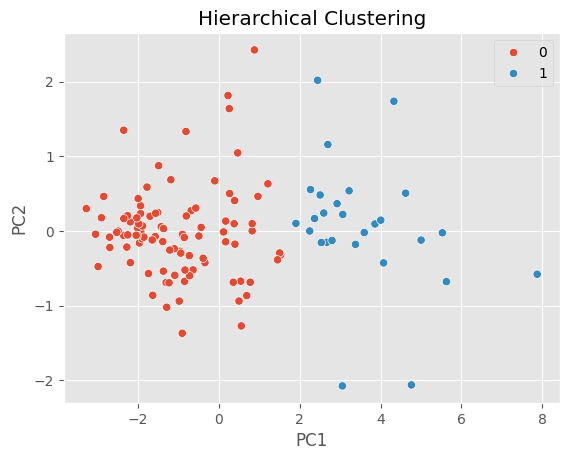

In [40]:
#El cálculo del cluster N=2 GRUPOS
paises = datos_pca.iloc[:, 1].values
model = AgglomerativeClustering(n_clusters=2)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'País': paises, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

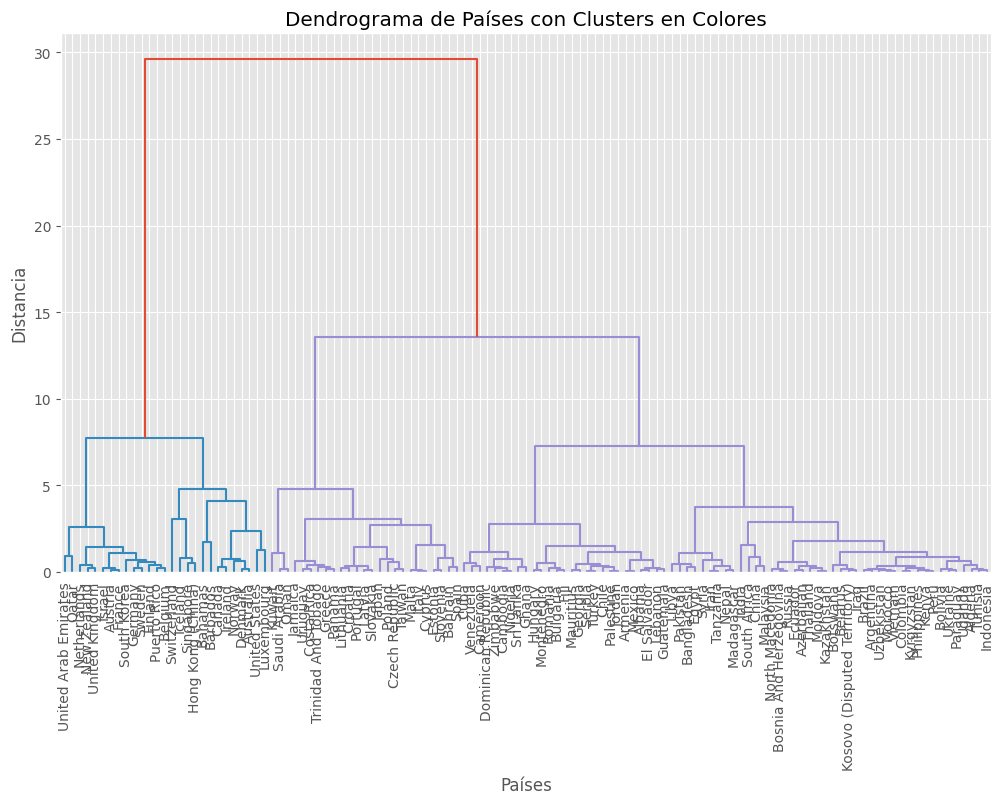

In [41]:
#El dendograma
model = sch.linkage(data, method='ward')

threshold = 0.7 * max(model[:, 2])  # Se basa en la distancia máxima para cortar


# Graficar el dendrograma con etiquetas de países y colores para los clusters
plt.figure(figsize=(12, 7))
sch.dendrogram(
    model,
    labels=paises,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=threshold  # Define el punto de corte para los colores
)

plt.title('Dendrograma de Países con Clusters en Colores')
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.show()

In [42]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras2.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras2.csv', index=False)

# Display the DataFrame
cluster_df

,País,Cluster
0,Switzerland,1
1,Bahamas,1
2,Iceland,1
3,Singapore,1
4,Barbados,1
...,...,...
116,Bangladesh,0
117,India,0
118,Egypt,0
119,Libya,0


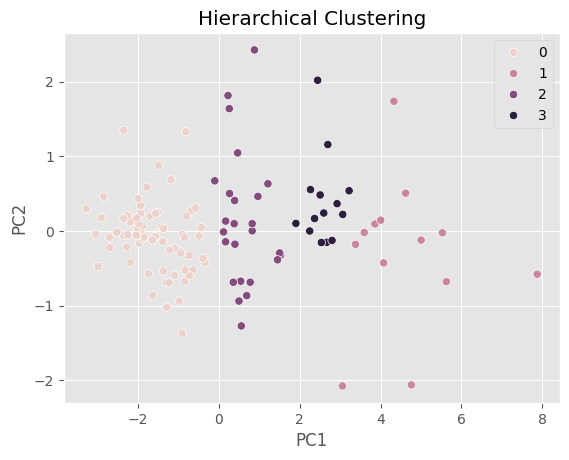

In [43]:
#El cálculo del cluster N=4 GRUPOS
model = AgglomerativeClustering(n_clusters=4)
model.fit(data)
labels = model.labels_
cluster_df = pd.DataFrame({'País': paises, 'Cluster': labels})
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=model.labels_)
plt.title('Hierarchical Clustering')
plt.show()

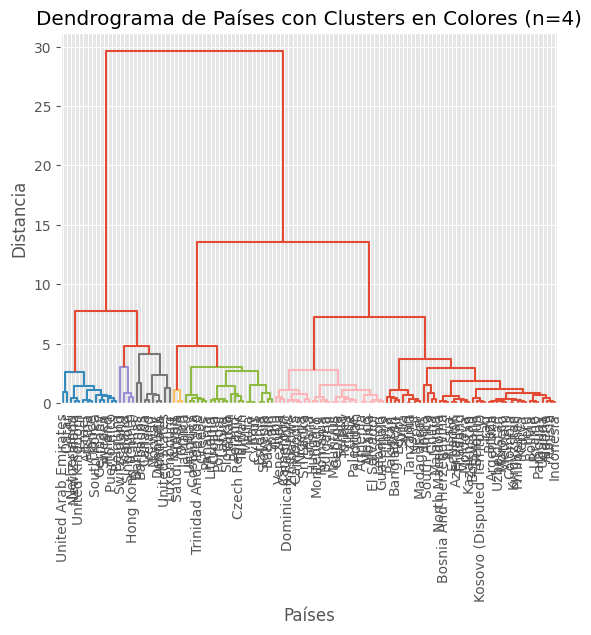

In [44]:
#Dendograma para 4 grupos

# Generar la matriz de enlaces con el método de Ward
model_linkage = sch.linkage(data, method='ward')

# Obtener etiquetas exactas de 5 clusters
cluster_labels = fcluster(model_linkage, t=4, criterion='maxclust')

# Asegurar que el umbral de corte refleje 5 clusters
distances = model_linkage[:, 2]
distances_sorted = np.sort(distances)
color_threshold = distances_sorted[-6]  # Ajuste preciso para 5 clusters

# Verificar si hay menos de 5 colores y ajustar si es necesario
dn = dendrogram(
    model_linkage,
    labels=paises,
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=color_threshold
)

# Obtener los colores usados en el dendrograma
colors_used = set(dn['leaves_color_list'])

# Si hay menos de 4 colores, ajustar el umbral y volver a dibujar
if len(colors_used) < 4:
    plt.close()  # Cerrar el primer gráfico antes de generar el nuevo
    color_threshold = distances_sorted[-7]  # Reducimos el umbral para forzar más colores

    # Graficar el dendrograma corregido
    plt.figure(figsize=(12, 7))
    dendrogram(
       model_linkage,
       labels=paises,
       leaf_rotation=90,
       leaf_font_size=10,
       color_threshold=color_threshold
    )

plt.title('Dendrograma de Países con Clusters en Colores (n=4)')
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.show()


In [45]:
# Obtener las etiquetas del cluster
cluster_df.to_csv('cluster_puras5.csv', index=False)

#Guardar el .csv
cluster_df.to_csv('cluster_puras5.csv', index=False)

# Display the DataFrame
cluster_df

,País,Cluster
0,Switzerland,1
1,Bahamas,1
2,Iceland,1
3,Singapore,1
4,Barbados,1
...,...,...
116,Bangladesh,0
117,India,0
118,Egypt,0
119,Libya,0
